# ML Algorithm Insight Series
## Module: Convolutional Neural Networks

### 1. Introduction & Intuition

Convolutional Neural Networks (CNNs) are tailored for image data. Instead of analyzing raw pixel inputs directly, CNNs scan images using learnable filters, detecting spatial hierarchies like edges, shapes, and textures.

Visualize a CNN as a sliding magnifying glass scanning an image for features. Each convolution layer acts as a pattern detector that becomes more abstract with depth.


### 2. How the Algorithm Works

A CNN typically includes:
- **Convolutional layers**: Learn spatial features using filters.
- **Activation functions**: Introduce non-linearity (ReLU).
- **Pooling layers**: Downsample feature maps, reducing spatial size.
- **Fully connected layers**: Perform final classification based on learned features.

Convolution operation:
\[
Z_{i,j}^{(k)} = (X * W^{(k)})_{i,j} + b^{(k)}
\]

Where:
- \( * \): convolution operator
- \( W^{(k)} \): filter for the \( k^{th} \) channel
- \( Z_{i,j}^{(k)} \): output feature map


### 3. Data and Preparation Insights

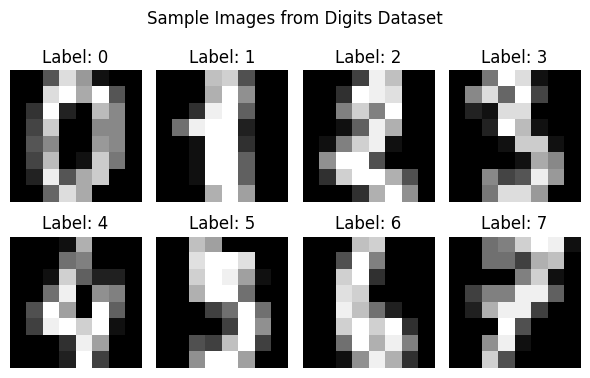

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.images, digits.target

plt.figure(figsize=(6, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Digits Dataset")
plt.tight_layout()
plt.show()

CNNs require consistent image shapes. Normalize pixel values and reshape as needed. Label encoding is necessary for classification tasks.

### 4. Implementation Highlights

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = X / 16.0  # normalize
X = X.reshape(-1, 8, 8, 1)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)


2025-05-23 23:34:26.578307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jasonrobinson/my-data-science-journey-3/ds_journey_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5. Insightful Visualization

In [3]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.96


Visualize feature maps or convolution filters to understand what the model is learning at different layers.

### 6. Algorithm Evaluation

In [4]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.93      0.96        28
           2       0.94      0.97      0.96        33
           3       0.97      0.94      0.96        34
           4       0.96      1.00      0.98        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.88      1.00      0.94        30
           9       0.95      0.88      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### 7. Pros, Cons, and Techniques

**Strengths:**
- Exceptional at extracting spatial features from images
- Fewer parameters than fully connected networks
- Translation invariant

**Limitations:**
- Requires substantial data for training
- Less effective for non-image tasks
- Interpretability can be limited

**Enhancements**:
- Use data augmentation for robustness
- Add dropout or batch normalization
- Explore deeper architectures (e.g., VGG, ResNet)


### 8. Further Explorations

- TODO: Visualize activation maps for different layers
- TODO: Experiment with deeper CNN architectures
- TODO: Apply to other image datasets (e.g., MNIST, CIFAR)


### 9. Summary & Resources

**Key Insights:**
- CNNs process image data using convolution and pooling operations.
- They're effective in capturing local and abstract patterns.
- Best used in visual recognition tasks with structured input.

**Further Reading:**
- “Deep Learning” – Goodfellow, Bengio, Courville
- Keras/TensorFlow Documentation: Conv2D, MaxPooling2D
- Lecun et al. (1998) - Gradient-Based Learning Applied to Document Recognition

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
